### Data Visualization practice

The objective of this data visualization project is to be able to answer some general questions with the netflix dataset. What we are looking for specifically is:

Which year had the most releases?

What is the proportion of Movies vs TV shows?

Distribution of the ratings

Top genres of movies

Top genres of tv shows

In [1]:
#Import necessary libraries for project
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.drop(['director','cast'], axis=1, inplace=True)

I decide to drop this 2 columns due to them having a lot of null values and not being important enought as to be in a simple visualization project, the objective here is to use the data to create some simple visualizations so we proceed without these 2 columns. 

In [5]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df['country'].replace(np.nan, 'United States', inplace = True)

In [7]:
df['country'].value_counts()

United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

The column 'country' is going to be useful for the visualizations so we dont drop this ciolumn instead we just replace NaN with United States due to it being the column with the most observations. 

In [8]:
df.drop(['date_added'], axis=1, inplace = True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [14]:
df['rating'].replace(np.nan, 'PG-13', inplace = True)

In [13]:
df['duration'].replace(np.nan, '90 min', inplace = True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

By dropping and replacing the remaining columns that had nulls we now have a clean dataframe ready to do some visualizations. 

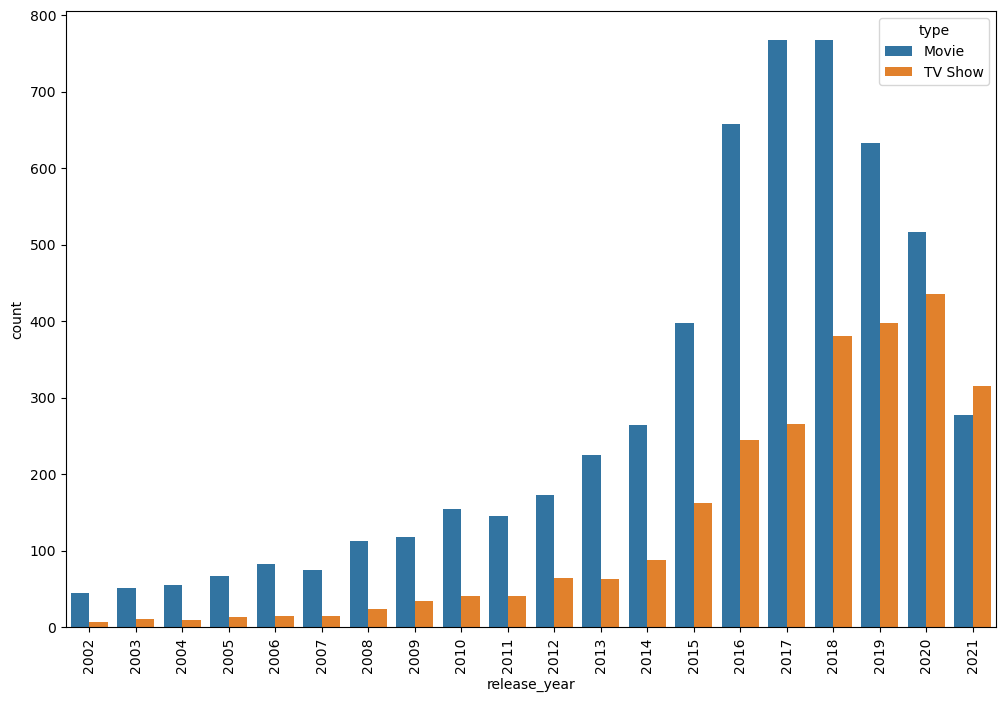

In [21]:
#Plot the last 20 years
top_20 = df['release_year'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 observations
df_top_20 = df[df['release_year'].isin(top_20)]

# Plot states with most startups
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(x='release_year', hue='type', data=df_top_20, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='release_year', ylabel='count')
plt.show()

We can see that the years with the most releases are 2017 and 2018. This tells us that those years were a big year for the industry because actually the trend from 2018 is downwards to 2021.

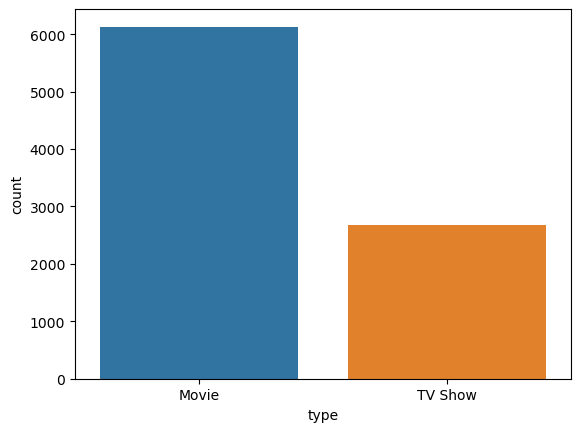

In [25]:
sns.countplot(x='type', data=df)
plt.show()

We can see that there are more than double the volume of movies than there are tv shows. 

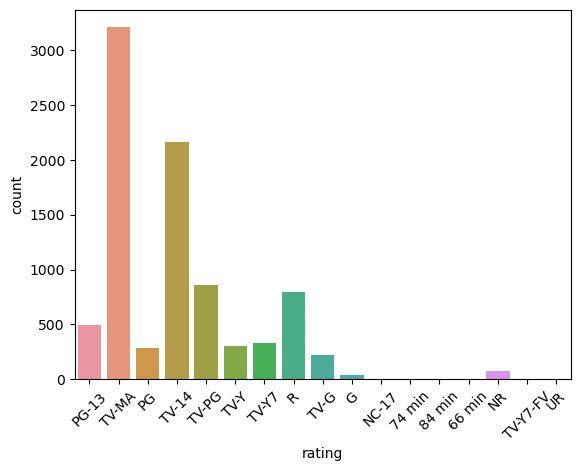

In [34]:
sns.countplot(x='rating', data=df)
ax.set(xlabel='Rating', ylabel='Count', title='Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

We can see that the ratings with most volume is TV-MA followed by TV-14. 

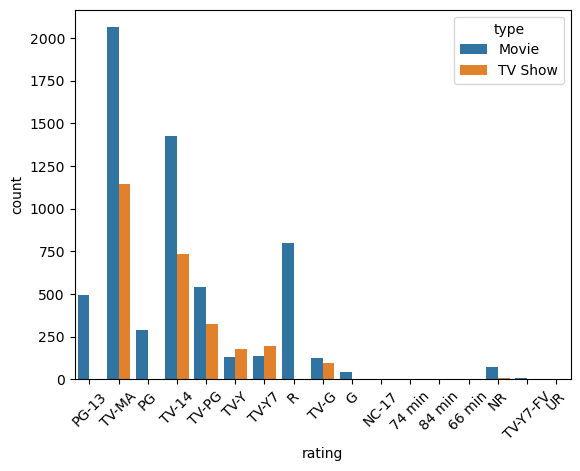

In [37]:
sns.countplot(x='rating', hue='type', data=df)
plt.xticks(rotation=45)
plt.show()

In this plot we can observe the volume of movies and tv shows that fall into a certain genre. 

In [38]:
We find intereseting trends like TV-MA being the most common tv rating, which then is followed by TV-14. This tells us that tv movies and tv shows are mostly d

show_id         object
type            object
title           object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object